<a href="https://colab.research.google.com/github/soda1102/AI_26/blob/main/01_01_MBC%EB%A7%88%EC%BC%93%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝 알고리즘은 지도학습, 비지도 학습으로 나누어진다.
# 지도학습 : 훈련하기 위한 데이터와 정답이 필요.
# 지도학습에서 데이터와 정답을 입력(input)과 타깃(target)이라고 한다.
# 입력값 : input, 정답값 : target으로 사용할 것!
# 이둘을 합쳐서 훈련데이터(training data)라고 한다
# 입력으로 사용된 길이와 무게 → 특성(feature)

# MBC 마켓에서 살아있는 생선을 최초로 판매하려고 한다.
# 고객이 온라인 주문을 하면 가장 빠른 물류센터에서 신성한 생선을 곧바로 배송
# 여기서 문제 발생 : 생선 포장 직원이 생선의 종류를 알지 못한다.
# IP 카메라를 이용해서 수족관을 실시간 촬영을 하고 이것저것 객체 추적 기술을 사용

# 우선 도미와 빙어 2개의 객체를 찾도록 훈련 시작(길이, 무게 특성 활용, 2진분류 사용해서 훈련)
# 1. 전처리 데이터 필요 : 도미 생선의 길이, 무게를 학습시켜 보자.

In [1]:
# 도미 생선의 길이 : bream_length 도미용 길이 리스트
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미 생선의 무게 : bream_weigh 도미용 무게 리스트
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
# 특성(feature) : 데이터의 특징
# 첫번째 도미의 특성 (길이 : 25.4cm, 무게 : 242.0g)
# 두번째 도미의 특성 (길이 : 26.3cm, 무게 : 290.0g)

# 두 특성을 숫자로 보는 것 보다 그래프로 표현하면 데이터를 잘 이해할 수 있다.
# 길이 : x축, 무게 : y축 → 산점도 (두 좌표의 관계)

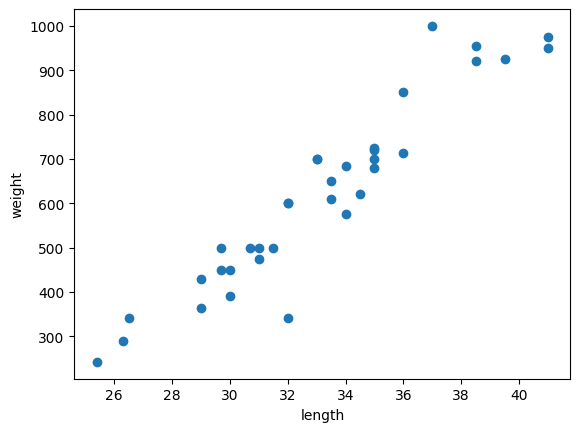

In [2]:
import matplotlib.pyplot as plt
# 파이썬에서 과학 계산용 그래프를 그리는 대표적인 패키지 : matplotlib
# https://wikidocs.net/92071 → matplotlib 사용법

plt.scatter(bream_length, bream_weight)  # 차트에 값을 넣는다.
# scatter : 차트의 종류(X축 : bream_length, Y축 : bream_weight)
plt.xlabel('length')  # X축 이름표
plt.ylabel('weight')  # Y축 이름표
plt.show()

# 도미 35마리를 2차원 그래프에 점으로 나타내봄
# 생선의 길이가 길 수록 무게가 많이 나간다. → 이 표를 선형적이라고 한다.

In [3]:
# 빙어 데이터 14개 준비

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

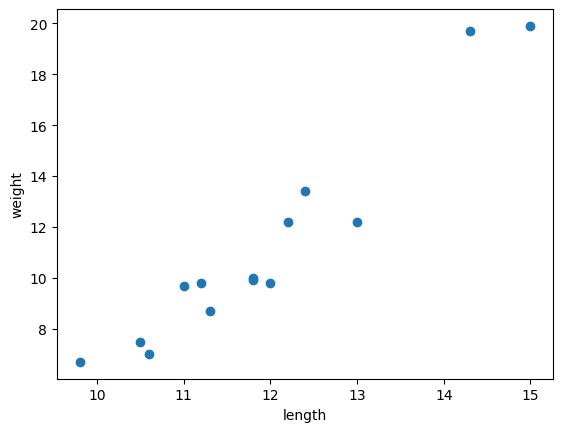

In [4]:
plt.scatter(smelt_length, smelt_weight)  # 차트에 값을 넣는다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 이 2개의 리스트를 합쳐서 ai 학습용 자료로 만들어야 한다.

length = bream_length + smelt_length  # 도미길이리스트 + 빙어길이리스트
weight = bream_weight + smelt_weight  # 도미무게리스트 + 빙어무게리스트

# 사이킷런을 이용한 ai트레이닝 시작
# 사이킷런의 입력은 2차원 리스트로 만들어야 한다.

print(length)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [6]:
print(weight)

[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


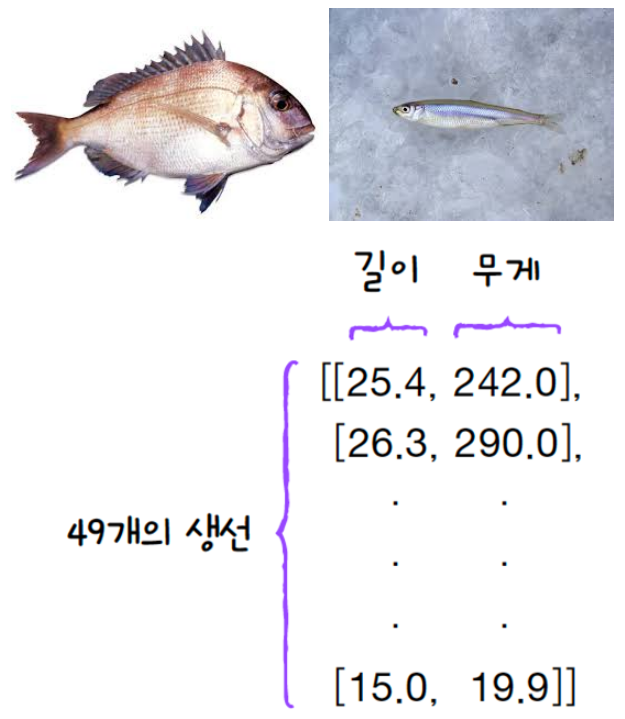

In [17]:
# zip() 나열된 리스트 각각에서 하나씩 원소를 꺼내어 반환
fish_data = [[l,w] for l, w in zip(length, weight)]
# length, weight를 2차원 리스트로 만든다.
print(fish_data)  # 2차원 리스트 출력 해보기

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [18]:
# 머신러닝은 정답을 target이라는 값으로 알려줘야 한다.
# target 0(빙어), 1(도미)을 처리하려 한다.

# 생선 49개에 대한 정답 리스트를 만들어야 한다.
# 머신러닝에서는 정답 데이터를 2진 분류로 테스트 해볼것이다. (1:도미, 0:빙어)

fish_target =[1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
# pip install scikit-learn 파이참에서는 설치 후 구동하기!
# 전처리 데이터가 완성되었으니 사이킷런 패키지를 활용하여 트레이닝을 해보자.

from sklearn.neighbors import KNeighborsClassifier  # 사이킷런패키지 안에.이웃패키지
#    사이킷런패키지.이웃모듈        2진분류용
                            # KNeighborsClassifier k-최근접 이웃 알고리즘
                            # K : 몇개의 이웃을 보겠다는 뜻 (기본값은 5개)
                            # Classifier : 2진분류

kn = KNeighborsClassifier()  # 임포트된 객체를 생성하여 변수에 연결
# kn. 하면 k-최근접 알고리즘을 사용한다.
# kn.fit() : 훈련시작
# kn.score() : 평가 → 점수보기
# kn.predict() : 결론보기 → 샘플 넣어서 2진비교

In [20]:
# fish_data, fish_target을 전달하여 도미를 찾기 위한 기준을 학습(.fit) 시킨다.
# (트레이닝데이터 : 훈련정답 데이터)

kn.fit(fish_data, fish_target)  # 훈련 끝

KNeighborsClassifier()

In [21]:
# kn 얼마나 잘 훈련되었는지를 평가해보자 .score()
kn.score(fish_data, fish_target)  # 1.0 = 100% (정확도)
# 훈련데이터와 평가데이터가 동일하기 때문에 100%의 정확도가 나온다.(더미데이터가 많지 않기 때문)
# 차후에는 더미데이터를 쪼개서 평가하는 것이 좋다.

1.0

In [22]:
# k-최근접 이웃 알고리즘 파악 해보기
# 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 출력

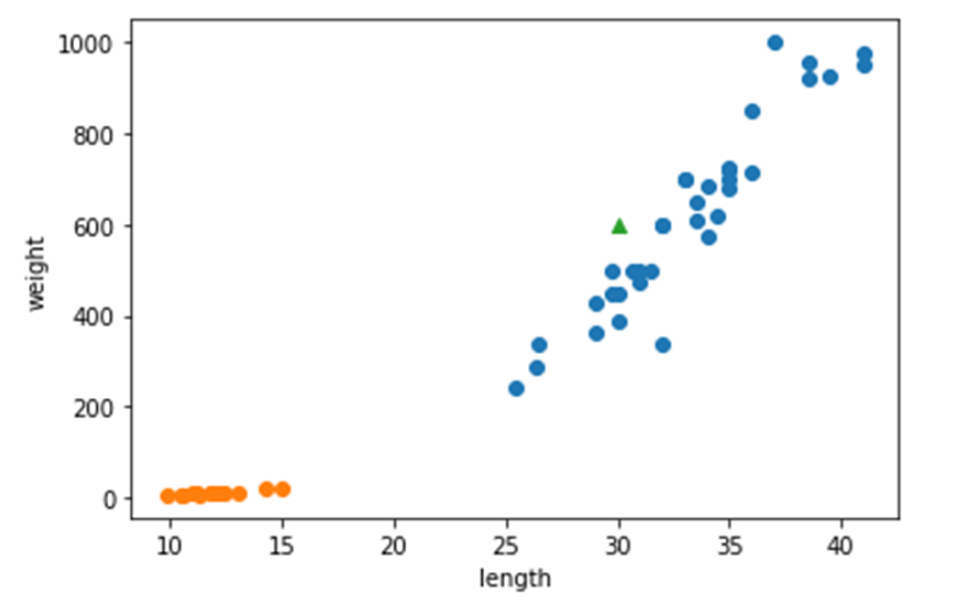

In [23]:
kn.predict([[30,600]])  # .predict[길이, 무게] 새로운 데이터의 정답을 예측(2진분류)
# 결론 1 → 도미

array([1])

In [24]:
kn.predict([[8,10]])  # .predict[길이, 무게] 새로운 데이터의 정답을 예측(2진분류)
# 결론 0 → 빙어

array([0])

In [25]:
# k-최근접 이웃 알고리즘을 위해 준비해야 할 일은 데이터를 모두 가지고 있는 게 전부
# 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기만 한다.
# 단점 : 데이터가 아주 많은 경우 사용하기 어렵다.
# 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리 계산 시간도 오래걸린다.
# 객체를 메모리에 만들고 활용한다.  → 재부팅 하면 fit를 다시 해줘야 한다.
print(kn._fit_X)  # _fit_X 내장된 변수로 훈련데이터를 보관한다.

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [26]:
print(kn._y)  # 정답파일 1 : 도미 / 0 : 빙어

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
# 결론 k-최근접 이웃 알고리즘은 훈련 결과 파일이 존재하지 않는다. (메모리에 로드 → 재부팅시 사라짐)
# 새로운 데이터가 들어오면 가장 가까운 데이터를 메모리에서 참고하여 도미, 빙어를 구분한다.
kn.predict([[5,15]])  # 길이가 5cm, 무게가 15g인 값을 판단하면 0 : 빙어

array([0])

In [28]:
# 객체 생성시 n_neighbors=??? 참고할 이웃 데이터 수 기본 값은 5개
# 이웃 객체를 5개 찾아내서 결론을 낸다.

# 만약 5개가 아닌 다른 값으로 변경하여 데이터를 훈련하고 싶다면
kn49 = KNeighborsClassifier(n_neighbors=49)  # 참고데이터를 49개로 한 모델 kn49 변수
#      KNeighborsClassifier(n_neighbors=5) 가 기본 → KNeighborsClassifier

# 원본타깃, 원본데이터가 49개인데 가장 가까운 데이터 49개를 사용함(전체데이터가 이웃?)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)  # 훈련결과 71%로 좋지 않은 성능을 보임

0.7142857142857143

In [29]:
# n_neighbors=값을 변경해가면서 최적의 정답을 찾는 것이 머신러닝 훈련개발자의 목표

kn49.predict([[5,15]])  # 길이 5cm, 무게 15g인 데이터를 찾아보자.

array([1])